In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import scipy.io
import tensorflow as tf


from tensorflow import keras
from keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier


from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from keras.losses import sparse_categorical_crossentropy

import matplotlib.pyplot as plt
import math
import numpy as np

In [5]:
mat = scipy.io.loadmat('USPS_all.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed May 09 15:12:18 2007',
 '__version__': '1.0',
 '__globals__': [],
 'fea': array([[-1.      , -1.      , -1.      , ..., -0.988672, -0.999475,
         -0.999994],
        [-0.999927, -0.993644, -0.900309, ..., -0.32939 , -0.584681,
         -0.868793],
        [-1.      , -1.      , -1.      , ..., -0.988116, -0.999864,
         -1.      ],
        ...,
        [-0.999985, -0.998547, -0.966704, ..., -1.      , -1.      ,
         -1.      ],
        [-0.999889, -0.996943, -0.962894, ..., -0.998277, -0.999924,
         -0.999998],
        [-1.      , -1.      , -1.      , ..., -0.999995, -1.      ,
         -1.      ]]),
 'gnd': array([[7],
        [6],
        [5],
        ...,
        [5],
        [1],
        [2]], dtype=uint8)}

(9298, 256)
(9298, 1)


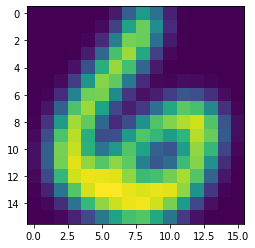

In [6]:
inputs = mat['fea']
targets = mat['gnd']
print(inputs.shape)
print(targets.shape)

reshapedInputs = []

for row in inputs:
    reshapedInputs.append(np.reshape(row,(16,16)))
    
reshapedInputs = np.array(reshapedInputs)
plt.imshow(reshapedInputs[0])

In [7]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1

In [8]:
def create_model(layers, nodes=100, activation1="relu", activation2="relu", loss="sparse_categorical_crossentropy", optimizer="adam", bias='zeros'):    
    model = Sequential()
    for i in range(0, layers):
        model.add(Conv2D(32,(3,3), activation=activation1, input_shape=(16,16,1), bias_initializer=bias))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    
    model.add(Dense(nodes, activation=activation1, bias_initializer=bias))
    model.add(Dense(10, activation=activation2, bias_initializer=bias))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [9]:
#optimizing number of layer & number of nodes
bestLayers = []
for train, test in kfold.split(reshapedInputs, targets):
    print("fold:", fold_no)
    model = KerasClassifier(build_fn=create_model)
    
    layers = [1,2,3]
    batch_size = [32]
    epochs = [50]
    param_grid = dict(layers=layers, batch_size=batch_size, epochs=epochs)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=[(slice(None), slice(None))])
    grid_result = grid_search.fit(reshapedInputs[train], targets[train])
    
    bestLayers.append((grid_result.best_params_).get('layers'))
    print("Best accuracy:", grid_result.best_score_)
    print("Best params:", grid_result.best_params_)
    fold_no += 1

fold: 1
Epoch 1/50
233/233 [==============================] - 1s 2ms/step - loss: 8.9533 - accuracy: 0.1162
Epoch 2/50
233/233 [==============================] - 1s 2ms/step - loss: 3.0872 - accuracy: 0.1901
Epoch 3/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 4/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 5/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 6/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 7/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 8/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 9/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 10/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy

233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 32/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 33/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 34/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 35/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 36/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 37/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 38/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 39/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Epoch 40/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1690
Ep

233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 11/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 12/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 13/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 14/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 15/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 16/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 17/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 18/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Epoch 19/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3023 - accuracy: 0.1644
Ep

233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 41/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 42/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 43/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 44/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 45/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 46/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 47/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 48/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 49/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Ep

In [10]:
import statistics
from statistics import mode

bestLayer = mode(bestLayers)

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1

In [11]:
bestNodes = []
for train, test in kfold.split(reshapedInputs, targets):
    print("fold:", fold_no)
    model = KerasClassifier(build_fn=create_model)
    
    layers = [bestLayer]
    nodes = [90, 100, 110, 120]
    batch_size = [32]
    epochs = [50]
    param_grid = dict(layers=layers, nodes=nodes, batch_size=batch_size, epochs=epochs)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid_search.fit(reshapedInputs[train], targets[train])
    
    bestNodes.append((grid_result.best_params_).get('nodes'))
    print("Best accuracy:", grid_result.best_score_)
    print("Best params:", grid_result.best_params_)
    fold_no += 1

fold: 1
Epoch 1/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3224 - accuracy: 0.1677
Epoch 2/50
233/233 [==============================] - 1s 2ms/step - loss: 2.2091 - accuracy: 0.1686
Epoch 3/50
233/233 [==============================] - 1s 2ms/step - loss: 2.2706 - accuracy: 0.1686
Epoch 4/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3020 - accuracy: 0.1686
Epoch 5/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3020 - accuracy: 0.1686
Epoch 6/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3020 - accuracy: 0.1686
Epoch 7/50
233/233 [==============================] - 1s 2ms/step - loss: 2.2835 - accuracy: 0.1686
Epoch 8/50
233/233 [==============================] - 1s 2ms/step - loss: 2.2713 - accuracy: 0.1686
Epoch 9/50
233/233 [==============================] - 1s 2ms/step - loss: 2.2676 - accuracy: 0.1686
Epoch 10/50
233/233 [==============================] - 1s 2ms/step - loss: 2.2676 - accuracy

233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 32/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 33/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 34/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 35/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 36/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 37/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 38/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 39/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Epoch 40/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1687
Ep

233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 11/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 12/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 13/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 14/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 15/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 16/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 17/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 18/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 19/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1648
Ep

233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 41/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 42/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 43/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 44/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 45/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 46/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 47/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 48/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1660
Epoch 49/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1660
Ep

In [12]:
bestNode = mode(bestNodes)

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1

In [13]:
bestBiasses = []
for train, test in kfold.split(reshapedInputs, targets):
    print("fold:", fold_no)
    model = KerasClassifier(build_fn=create_model)
    
    bias = ['zeros', 'ones']
    layers = [bestLayer]
    nodes = [bestNode]
    batch_size = [32]
    epochs = [50]
    param_grid = dict(bias=bias, layers=layers, nodes=nodes, batch_size=batch_size, epochs=epochs)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid_search.fit(reshapedInputs[train], targets[train])
    
    bestBiasses.append((grid_result.best_params_).get('bias'))
    print("Best accuracy:", grid_result.best_score_)
    print("Best params:", grid_result.best_params_)
    fold_no += 1

fold: 1
Epoch 1/50
233/233 [==============================] - 1s 2ms/step - loss: 7.6700 - accuracy: 0.1658
Epoch 2/50
233/233 [==============================] - 1s 2ms/step - loss: 6.5691 - accuracy: 0.2878
Epoch 3/50
233/233 [==============================] - 1s 2ms/step - loss: 1.7949 - accuracy: 0.4235
Epoch 4/50
233/233 [==============================] - 1s 2ms/step - loss: 2.0264 - accuracy: 0.2854
Epoch 5/50
233/233 [==============================] - 1s 2ms/step - loss: 2.1193 - accuracy: 0.2428
Epoch 6/50
233/233 [==============================] - 1s 2ms/step - loss: 2.0922 - accuracy: 0.2571
Epoch 7/50
233/233 [==============================] - 1s 2ms/step - loss: 2.1387 - accuracy: 0.2385
Epoch 8/50
233/233 [==============================] - 1s 2ms/step - loss: 2.1756 - accuracy: 0.2195
Epoch 9/50
233/233 [==============================] - 1s 2ms/step - loss: 2.1788 - accuracy: 0.2175
Epoch 10/50
233/233 [==============================] - 1s 2ms/step - loss: 2.2517 - accuracy

233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 31/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 32/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 33/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 34/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 35/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 36/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 37/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 38/50
233/233 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1677
Epoch 39/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1677
Ep

233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 9/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 10/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 11/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 12/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 13/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 14/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 15/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 16/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epoch 17/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1699
Epo

233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 39/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 40/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 41/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 42/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 43/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 44/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 45/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 46/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Epoch 47/50
233/233 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1679
Ep

In [14]:
bestBias = mode(bestBiasses)

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1

In [15]:
bestActivation1 = []
bestActivation2 = []
for train, test in kfold.split(reshapedInputs, targets):
    print("fold:", fold_no)
    model = KerasClassifier(build_fn=create_model)
    
    activation1 = ['relu','softmax']
    activation2 = ['relu','softmax']
    bias = [bestBias]
    layers = [bestLayer]
    nodes = [bestNode]
    batch_size = [32]
    epochs = [50]
    param_grid = dict(activation1=activation1,activation2=activation2, bias=bias, layers=layers, nodes=nodes, batch_size=batch_size, epochs=epochs)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
    grid_result = grid_search.fit(reshapedInputs[train], targets[train])
    
    bestActivation1.append((grid_result.best_params_).get('activation1'))
    bestActivation2.append((grid_result.best_params_).get('activation2'))
    print("Best accuracy:", grid_result.best_score_)
    print("Best params:", grid_result.best_params_)
    fold_no += 1

fold: 1
Epoch 1/50
186/186 [==============================] - 1s 2ms/step - loss: 8.1754 - accuracy: 0.0966
Epoch 2/50
186/186 [==============================] - 0s 2ms/step - loss: 7.6142 - accuracy: 0.0938
Epoch 3/50
186/186 [==============================] - 0s 2ms/step - loss: 7.2904 - accuracy: 0.0938
Epoch 4/50
186/186 [==============================] - 0s 2ms/step - loss: 7.1780 - accuracy: 0.0968
Epoch 5/50
186/186 [==============================] - 0s 2ms/step - loss: 7.1250 - accuracy: 0.0978
Epoch 6/50
186/186 [==============================] - 0s 2ms/step - loss: 7.0975 - accuracy: 0.0988
Epoch 7/50
186/186 [==============================] - 0s 2ms/step - loss: 6.3795 - accuracy: 0.2126
Epoch 8/50
186/186 [==============================] - 0s 2ms/step - loss: 2.1402 - accuracy: 0.3496
Epoch 9/50
186/186 [==============================] - 0s 2ms/step - loss: 2.0043 - accuracy: 0.2956
Epoch 10/50
186/186 [==============================] - 0s 2ms/step - loss: 2.0108 - accuracy

186/186 [==============================] - 0s 2ms/step - loss: 2.3014 - accuracy: 0.1733
Epoch 32/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3116 - accuracy: 0.1763
Epoch 33/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 34/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 35/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 36/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 37/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 38/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 39/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 40/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1728
Ep

186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 11/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 12/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 13/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 14/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 15/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 16/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 17/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 18/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1674
Epoch 19/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1674
Ep

186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 41/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 42/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 43/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 44/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 45/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 46/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 47/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 48/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 49/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Ep

186/186 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 20/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9997
Epoch 21/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0071 - accuracy: 0.9987
Epoch 22/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9864
Epoch 23/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 24/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9992
Epoch 25/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 26/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9995
Epoch 27/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9997
Epoch 28/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9997
Ep

186/186 [==============================] - 0s 2ms/step - loss: 2.8527e-04 - accuracy: 1.0000
Epoch 50/50
47/47 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9866
Epoch 1/50
186/186 [==============================] - 1s 2ms/step - loss: 0.5450 - accuracy: 0.8427
Epoch 2/50
186/186 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9486
Epoch 3/50
186/186 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9649
Epoch 4/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.9734
Epoch 5/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9792
Epoch 6/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9835
Epoch 7/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9855
Epoch 8/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9871
Epoch 9/

186/186 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9998
Epoch 29/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.9997
Epoch 30/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 31/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 32/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.9997
Epoch 33/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 34/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9866
Epoch 35/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9940
Epoch 36/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 37/50
186/186 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9998
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 11/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 12/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 13/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 14/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 15/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1728
Epoch 16/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1728
Epoc

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 38/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 39/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 40/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 41/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 42/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 43/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 44/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 45/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1716
Epoch 46/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1716
Ep

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 17/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 18/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 19/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 20/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 21/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 22/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 23/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 24/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Epoch 25/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1664
Ep

186/186 [==============================] - 1s 3ms/step - loss: 0.5141 - accuracy: 0.7571
Epoch 47/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5072 - accuracy: 0.7655
Epoch 48/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5023 - accuracy: 0.7684
Epoch 49/50
186/186 [==============================] - 1s 3ms/step - loss: 0.4951 - accuracy: 0.7807
Epoch 50/50
47/47 [==============================] - 0s 2ms/step - loss: 0.4683 - accuracy: 0.8004
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 2.2445 - accuracy: 0.2111
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 1.9983 - accuracy: 0.3886
Epoch 3/50
186/186 [==============================] - 1s 3ms/step - loss: 1.7600 - accuracy: 0.5403
Epoch 4/50
186/186 [==============================] - 1s 3ms/step - loss: 1.5886 - accuracy: 0.5765
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 1.4489 - accuracy: 0.5825
Epoch 6/5

186/186 [==============================] - 1s 3ms/step - loss: 1.2309 - accuracy: 0.4491
Epoch 26/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2224 - accuracy: 0.4556
Epoch 27/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2159 - accuracy: 0.4571
Epoch 28/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2083 - accuracy: 0.4625
Epoch 29/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2005 - accuracy: 0.4650
Epoch 30/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1948 - accuracy: 0.4655
Epoch 31/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1874 - accuracy: 0.4691
Epoch 32/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1804 - accuracy: 0.4724
Epoch 33/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1748 - accuracy: 0.4738
Epoch 34/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1694 - accuracy: 0.4758
Ep

186/186 [==============================] - 1s 3ms/step - loss: 1.5816 - accuracy: 0.4710
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 1.4720 - accuracy: 0.4757
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 1.3886 - accuracy: 0.4811
Epoch 7/50
186/186 [==============================] - 1s 3ms/step - loss: 1.3242 - accuracy: 0.4771
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2737 - accuracy: 0.4848
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2337 - accuracy: 0.4860
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2009 - accuracy: 0.4876
Epoch 11/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1737 - accuracy: 0.4838
Epoch 12/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1516 - accuracy: 0.4875
Epoch 13/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1332 - accuracy: 0.4882
Epoch 1

233/233 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 35/50
233/233 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 36/50
233/233 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 37/50
233/233 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9997
Epoch 38/50
233/233 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 39/50
233/233 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 40/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 41/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 42/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 43/50
233/233 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9923
Ep

186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 13/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 14/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 15/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 16/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 17/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 18/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 19/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 20/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Epoch 21/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1691
Ep

186/186 [==============================] - 0s 2ms/step - loss: 2.3010 - accuracy: 0.1676
Epoch 43/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3010 - accuracy: 0.1676
Epoch 44/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3010 - accuracy: 0.1676
Epoch 45/50
186/186 [==============================] - 0s 2ms/step - loss: 2.3010 - accuracy: 0.1676
Epoch 46/50
186/186 [==============================] - 0s 3ms/step - loss: 2.2820 - accuracy: 0.1679
Epoch 47/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 48/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 49/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 50/50
47/47 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1478
Epoch 1/50
186/186 [==============================] - 1s 2ms/step - loss: 2.3949 - accuracy: 0.1657
Epoch

186/186 [==============================] - 0s 2ms/step - loss: 3.7602 - accuracy: 0.1183
Epoch 22/50
186/186 [==============================] - 0s 2ms/step - loss: 3.7064 - accuracy: 0.1007
Epoch 23/50
186/186 [==============================] - 0s 2ms/step - loss: 3.7071 - accuracy: 0.0833
Epoch 24/50
186/186 [==============================] - 0s 2ms/step - loss: 3.6512 - accuracy: 0.0943
Epoch 25/50
186/186 [==============================] - 0s 2ms/step - loss: 3.6562 - accuracy: 0.1193
Epoch 26/50
186/186 [==============================] - 0s 3ms/step - loss: 3.6656 - accuracy: 0.1119
Epoch 27/50
186/186 [==============================] - 0s 2ms/step - loss: 3.6332 - accuracy: 0.1065
Epoch 28/50
186/186 [==============================] - 0s 3ms/step - loss: 3.6430 - accuracy: 0.1126
Epoch 29/50
186/186 [==============================] - 0s 3ms/step - loss: 3.6241 - accuracy: 0.1165
Epoch 30/50
186/186 [==============================] - 0s 2ms/step - loss: 3.6249 - accuracy: 0.1423
Ep

47/47 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.9872
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5108 - accuracy: 0.8556
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 0.1753 - accuracy: 0.9497
Epoch 3/50
186/186 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9652
Epoch 4/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0932 - accuracy: 0.9736
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9793
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.9842
Epoch 7/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0446 - accuracy: 0.9876
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0388 - accuracy: 0.9899
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9928
Epoch 10/50
1

186/186 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 31/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 32/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9992
Epoch 33/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9995
Epoch 34/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 35/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 36/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 37/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 38/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 39/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.9997
Ep

186/186 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9966
Epoch 10/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9961
Epoch 11/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9965
Epoch 12/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9978
Epoch 13/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 14/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 15/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9983
Epoch 16/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9988
Epoch 17/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.9998
Epoch 18/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9993
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 39/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 40/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 41/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 42/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 43/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 44/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 45/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 46/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Epoch 47/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1539
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 18/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 19/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 20/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 21/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 22/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 23/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 24/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 25/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 26/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1669
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1647
Epoch 48/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1647
Epoch 49/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1647
Epoch 50/50
47/47 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1567
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 2.6617 - accuracy: 0.1581
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1608
Epoch 3/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1608
Epoch 4/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1608
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1608
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1608
Epoch 7/50

186/186 [==============================] - 1s 3ms/step - loss: 0.7739 - accuracy: 0.5884
Epoch 27/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7697 - accuracy: 0.5854
Epoch 28/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7657 - accuracy: 0.5892
Epoch 29/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7624 - accuracy: 0.5953
Epoch 30/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7591 - accuracy: 0.5982
Epoch 31/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7556 - accuracy: 0.5997
Epoch 32/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7522 - accuracy: 0.5997
Epoch 33/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7497 - accuracy: 0.6007
Epoch 34/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7470 - accuracy: 0.6024
Epoch 35/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7408 - accuracy: 0.6205
Ep

186/186 [==============================] - 1s 3ms/step - loss: 1.2852 - accuracy: 0.6627
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1630 - accuracy: 0.6666
Epoch 7/50
186/186 [==============================] - 1s 3ms/step - loss: 1.0673 - accuracy: 0.6677
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 0.9921 - accuracy: 0.6696
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 0.9325 - accuracy: 0.6736
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 0.8838 - accuracy: 0.6743
Epoch 11/50
186/186 [==============================] - 1s 3ms/step - loss: 0.8444 - accuracy: 0.6751
Epoch 12/50
186/186 [==============================] - 1s 3ms/step - loss: 0.8118 - accuracy: 0.6780
Epoch 13/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7850 - accuracy: 0.6780
Epoch 14/50
186/186 [==============================] - 1s 3ms/step - loss: 0.7613 - accuracy: 0.6825
Epoch 

186/186 [==============================] - 1s 3ms/step - loss: 0.7298 - accuracy: 0.7184
Epoch 36/50
186/186 [==============================] - 1s 3ms/step - loss: 0.6822 - accuracy: 0.7669
Epoch 37/50
186/186 [==============================] - 1s 3ms/step - loss: 0.6400 - accuracy: 0.7758
Epoch 38/50
186/186 [==============================] - 1s 3ms/step - loss: 0.6068 - accuracy: 0.7863
Epoch 39/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5821 - accuracy: 0.7889
Epoch 40/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5637 - accuracy: 0.7921
Epoch 41/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5470 - accuracy: 0.7997
Epoch 42/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5335 - accuracy: 0.8000
Epoch 43/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5213 - accuracy: 0.8044
Epoch 44/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5103 - accuracy: 0.8135
Ep

233/233 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.9984
Epoch 15/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0117 - accuracy: 0.9970
Epoch 16/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0101 - accuracy: 0.9980
Epoch 17/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.9919
Epoch 18/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0129 - accuracy: 0.9961
Epoch 19/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0072 - accuracy: 0.9980
Epoch 20/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0049 - accuracy: 0.9995
Epoch 21/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.9989
Epoch 22/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0029 - accuracy: 0.9997
Epoch 23/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0112 - accuracy: 0.9969
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 44/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 45/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 46/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 47/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 48/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 49/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 50/50
47/47 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1983
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 2.9905 - accuracy: 0.2667
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3045 - accuracy: 0.1724
Epoch 

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 23/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 24/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 25/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 26/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 27/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 28/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 29/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 30/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 31/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.8162 - accuracy: 0.1840
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 3/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 4/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 6/50
186/186 [==============================] - 0s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 7/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1650
Epoch 11/5

186/186 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9866
Epoch 32/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9938
Epoch 33/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9978
Epoch 34/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9995
Epoch 35/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 36/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 37/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9995
Epoch 38/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 39/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9997
Epoch 40/50
186/186 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.9997
Ep

186/186 [==============================] - 1s 3ms/step - loss: 0.0317 - accuracy: 0.9923
Epoch 11/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0255 - accuracy: 0.9931
Epoch 12/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0202 - accuracy: 0.9953
Epoch 13/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9953
Epoch 14/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0165 - accuracy: 0.9968
Epoch 15/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 0.9976
Epoch 16/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0144 - accuracy: 0.9961
Epoch 17/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0092 - accuracy: 0.9985
Epoch 18/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0187 - accuracy: 0.9933
Epoch 19/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0137 - accuracy: 0.9966
Ep

186/186 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 41/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9916
Epoch 42/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0237 - accuracy: 0.9931
Epoch 43/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 44/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 45/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 46/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9998
Epoch 47/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 48/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 49/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9997
Ep

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 20/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 21/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 22/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 23/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 24/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 25/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 26/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 27/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Epoch 28/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1593
Ep

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1724
Epoch 50/50
47/47 [==============================] - 0s 2ms/step - loss: 2.3026 - accuracy: 0.1458
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 2.5550 - accuracy: 0.1684
Epoch 2/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 3/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 4/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 5/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 7/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1703
Epoch 9/50
1

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 29/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 30/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 31/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 32/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 33/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 34/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 35/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 36/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1685
Epoch 37/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1685
Ep

186/186 [==============================] - 1s 4ms/step - loss: 1.3961 - accuracy: 0.4585
Epoch 8/50
186/186 [==============================] - 1s 4ms/step - loss: 1.3472 - accuracy: 0.4541
Epoch 9/50
186/186 [==============================] - 1s 4ms/step - loss: 1.3075 - accuracy: 0.4582
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2736 - accuracy: 0.4568
Epoch 11/50
186/186 [==============================] - 1s 4ms/step - loss: 1.2461 - accuracy: 0.4602
Epoch 12/50
186/186 [==============================] - 1s 4ms/step - loss: 1.2227 - accuracy: 0.4608
Epoch 13/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2019 - accuracy: 0.4666
Epoch 14/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1820 - accuracy: 0.4711
Epoch 15/50
186/186 [==============================] - 1s 3ms/step - loss: 1.1622 - accuracy: 0.4824
Epoch 16/50
186/186 [==============================] - 1s 4ms/step - loss: 1.1418 - accuracy: 0.4948
Epoc

186/186 [==============================] - 1s 3ms/step - loss: 0.6137 - accuracy: 0.7797
Epoch 38/50
186/186 [==============================] - 1s 3ms/step - loss: 0.6054 - accuracy: 0.7798
Epoch 39/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5959 - accuracy: 0.7837
Epoch 40/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5895 - accuracy: 0.7808
Epoch 41/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5811 - accuracy: 0.7844
Epoch 42/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5729 - accuracy: 0.7881
Epoch 43/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5670 - accuracy: 0.7879
Epoch 44/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5600 - accuracy: 0.7901
Epoch 45/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5527 - accuracy: 0.7923
Epoch 46/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5469 - accuracy: 0.7913
Ep

186/186 [==============================] - 1s 4ms/step - loss: 1.0550 - accuracy: 0.4841
Epoch 17/50
186/186 [==============================] - 1s 4ms/step - loss: 1.0435 - accuracy: 0.4816
Epoch 18/50
186/186 [==============================] - 1s 4ms/step - loss: 1.0338 - accuracy: 0.4851
Epoch 19/50
186/186 [==============================] - 1s 4ms/step - loss: 1.0247 - accuracy: 0.4848
Epoch 20/50
186/186 [==============================] - 1s 4ms/step - loss: 1.0168 - accuracy: 0.4846
Epoch 21/50
186/186 [==============================] - 1s 4ms/step - loss: 1.0085 - accuracy: 0.4882
Epoch 22/50
186/186 [==============================] - 1s 4ms/step - loss: 1.0027 - accuracy: 0.4868
Epoch 23/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9970 - accuracy: 0.4878
Epoch 24/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9913 - accuracy: 0.4880
Epoch 25/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9863 - accuracy: 0.4905
Ep

186/186 [==============================] - 1s 4ms/step - loss: 0.5535 - accuracy: 0.8629
Epoch 47/50
186/186 [==============================] - 1s 4ms/step - loss: 0.5384 - accuracy: 0.8720
Epoch 48/50
186/186 [==============================] - 1s 4ms/step - loss: 0.5225 - accuracy: 0.8857
Epoch 49/50
186/186 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0.8908
Epoch 50/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6284 - accuracy: 0.8426
Epoch 1/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8789
Epoch 2/50
233/233 [==============================] - 1s 3ms/step - loss: 0.1569 - accuracy: 0.9583
Epoch 3/50
233/233 [==============================] - 1s 3ms/step - loss: 0.1088 - accuracy: 0.9676
Epoch 4/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0863 - accuracy: 0.9741
Epoch 5/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.9809
Epoch 6/5

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 25/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 26/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 27/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 28/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 29/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 30/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 31/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 32/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 33/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1667
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 4/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 7/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 11/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 12/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1756
Epoch 13

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 34/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 35/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 36/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 37/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 38/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 39/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 40/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 41/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 42/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1726
Ep

186/186 [==============================] - 1s 3ms/step - loss: 0.0275 - accuracy: 0.9923
Epoch 13/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0205 - accuracy: 0.9951
Epoch 14/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9971
Epoch 15/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0151 - accuracy: 0.9965
Epoch 16/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0117 - accuracy: 0.9975
Epoch 17/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0109 - accuracy: 0.9973
Epoch 18/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0104 - accuracy: 0.9982
Epoch 19/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.9990
Epoch 20/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0087 - accuracy: 0.9982
Epoch 21/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0110 - accuracy: 0.9966
Ep

186/186 [==============================] - 1s 3ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 43/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9995
Epoch 44/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0043 - accuracy: 0.9985
Epoch 45/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0211 - accuracy: 0.9940
Epoch 46/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9953
Epoch 47/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 48/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0066 - accuracy: 0.9985
Epoch 49/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 50/50
47/47 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9805
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 0.4982 - accuracy: 0.8573
Epoch

186/186 [==============================] - 1s 3ms/step - loss: 0.0058 - accuracy: 0.9992
Epoch 21/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0044 - accuracy: 0.9997
Epoch 22/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9997
Epoch 23/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 0.9995
Epoch 24/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9997
Epoch 25/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9997
Epoch 26/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9995
Epoch 27/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0025 - accuracy: 0.9997
Epoch 28/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0029 - accuracy: 0.9992
Epoch 29/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9874
Ep

47/47 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.9536
Epoch 1/50
186/186 [==============================] - 1s 4ms/step - loss: 2.4339 - accuracy: 0.1667
Epoch 2/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 3/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 4/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 5/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 6/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 7/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 8/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 9/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1667
Epoch 10/50
1

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 30/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 31/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 32/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 33/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 34/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 35/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 36/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 37/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Epoch 38/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1759
Ep

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 9/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 10/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 11/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 12/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 13/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 14/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 15/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 16/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epoch 17/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1726
Epo

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 39/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 40/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 41/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 42/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 43/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 44/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 45/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 46/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Epoch 47/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1709
Ep

186/186 [==============================] - 1s 4ms/step - loss: 0.8641 - accuracy: 0.6034
Epoch 18/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8485 - accuracy: 0.6101
Epoch 19/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8331 - accuracy: 0.6180
Epoch 20/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8208 - accuracy: 0.6216
Epoch 21/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8063 - accuracy: 0.6298
Epoch 22/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7941 - accuracy: 0.6362
Epoch 23/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7815 - accuracy: 0.6416
Epoch 24/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7700 - accuracy: 0.6476
Epoch 25/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7563 - accuracy: 0.6587
Epoch 26/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7435 - accuracy: 0.6663
Ep

186/186 [==============================] - 1s 4ms/step - loss: 0.6754 - accuracy: 0.7785
Epoch 48/50
186/186 [==============================] - 1s 4ms/step - loss: 0.6622 - accuracy: 0.7861
Epoch 49/50
186/186 [==============================] - 1s 4ms/step - loss: 0.6454 - accuracy: 0.7963
Epoch 50/50
47/47 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.7466
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 2.2377 - accuracy: 0.2374
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 1.9504 - accuracy: 0.3801
Epoch 3/50
186/186 [==============================] - 1s 3ms/step - loss: 1.6902 - accuracy: 0.5602
Epoch 4/50
186/186 [==============================] - 1s 3ms/step - loss: 1.5138 - accuracy: 0.5823
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 1.3839 - accuracy: 0.5814
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 1.2851 - accuracy: 0.5873
Epoch 7/50

186/186 [==============================] - 1s 4ms/step - loss: 0.8189 - accuracy: 0.6038
Epoch 27/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8127 - accuracy: 0.6008
Epoch 28/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8075 - accuracy: 0.6141
Epoch 29/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8018 - accuracy: 0.6111
Epoch 30/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7955 - accuracy: 0.6137
Epoch 31/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7893 - accuracy: 0.6233
Epoch 32/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7832 - accuracy: 0.6287
Epoch 33/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7769 - accuracy: 0.6347
Epoch 34/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7695 - accuracy: 0.6379
Epoch 35/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7617 - accuracy: 0.6494
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 7/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 11/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 12/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 13/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1556
Epoch 1

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 35/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 36/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 37/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 38/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 39/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 40/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 41/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 42/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 43/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1704
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 14/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 15/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 16/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 17/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 18/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 19/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 20/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 21/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Epoch 22/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1648
Ep

186/186 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1638
Epoch 44/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1638
Epoch 45/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1638
Epoch 46/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1638
Epoch 47/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1638
Epoch 48/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1638
Epoch 49/50
186/186 [==============================] - 1s 3ms/step - loss: 2.3010 - accuracy: 0.1638
Epoch 50/50
47/47 [==============================] - 0s 1ms/step - loss: 2.3026 - accuracy: 0.1681
Epoch 1/50
186/186 [==============================] - 1s 3ms/step - loss: 0.5448 - accuracy: 0.8392
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 0.2005 - accuracy: 0.9425
Epoch 

186/186 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9966
Epoch 23/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0065 - accuracy: 0.9990
Epoch 24/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 25/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 26/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9997
Epoch 27/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0032 - accuracy: 0.9997
Epoch 28/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9997
Epoch 29/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9997
Epoch 30/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 31/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0456 - accuracy: 0.9859
Ep

186/186 [==============================] - 1s 3ms/step - loss: 0.5206 - accuracy: 0.8509
Epoch 2/50
186/186 [==============================] - 1s 3ms/step - loss: 0.1908 - accuracy: 0.9487
Epoch 3/50
186/186 [==============================] - 1s 3ms/step - loss: 0.1284 - accuracy: 0.9642
Epoch 4/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0996 - accuracy: 0.9723
Epoch 5/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9798
Epoch 6/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0562 - accuracy: 0.9837
Epoch 7/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9845
Epoch 8/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0415 - accuracy: 0.9874
Epoch 9/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.9914
Epoch 10/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0279 - accuracy: 0.9928
Epoch 11/5

186/186 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 32/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0026 - accuracy: 0.9997
Epoch 33/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0020 - accuracy: 0.9998
Epoch 34/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 35/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 36/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0024 - accuracy: 0.9997
Epoch 37/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 38/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9997
Epoch 39/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9997
Epoch 40/50
186/186 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.9998
Ep

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 11/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 12/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 13/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 14/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 15/50
186/186 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 16/50
186/186 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 17/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 18/50
186/186 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1704
Epoch 19/50
186/186 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1704
Ep

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 41/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 42/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 43/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 44/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 45/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 46/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 47/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 48/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Epoch 49/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1669
Ep

186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 20/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 21/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 22/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 23/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 24/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 25/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 26/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 27/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Epoch 28/50
186/186 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1631
Ep

186/186 [==============================] - 1s 4ms/step - loss: 0.5715 - accuracy: 0.7900
Epoch 50/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5398 - accuracy: 0.7903
Epoch 1/50
186/186 [==============================] - 1s 4ms/step - loss: 2.2396 - accuracy: 0.2174
Epoch 2/50
186/186 [==============================] - 1s 4ms/step - loss: 1.9821 - accuracy: 0.3324
Epoch 3/50
186/186 [==============================] - 1s 4ms/step - loss: 1.7667 - accuracy: 0.4139
Epoch 4/50
186/186 [==============================] - 1s 4ms/step - loss: 1.6096 - accuracy: 0.4853
Epoch 5/50
186/186 [==============================] - 1s 4ms/step - loss: 1.4941 - accuracy: 0.4890
Epoch 6/50
186/186 [==============================] - 1s 4ms/step - loss: 1.4084 - accuracy: 0.4920
Epoch 7/50
186/186 [==============================] - 1s 4ms/step - loss: 1.3431 - accuracy: 0.4929
Epoch 8/50
186/186 [==============================] - 1s 4ms/step - loss: 1.2919 - accuracy: 0.4947
Epoch 9/50
1

186/186 [==============================] - 1s 4ms/step - loss: 0.9680 - accuracy: 0.5644
Epoch 29/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9621 - accuracy: 0.5665
Epoch 30/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9566 - accuracy: 0.5676
Epoch 31/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9511 - accuracy: 0.5683
Epoch 32/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9458 - accuracy: 0.5702
Epoch 33/50
186/186 [==============================] - 1s 5ms/step - loss: 0.9401 - accuracy: 0.5739
Epoch 34/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9349 - accuracy: 0.5745
Epoch 35/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9306 - accuracy: 0.5740
Epoch 36/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9254 - accuracy: 0.5755
Epoch 37/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9216 - accuracy: 0.5732
Ep

186/186 [==============================] - 1s 4ms/step - loss: 1.1157 - accuracy: 0.6440
Epoch 8/50
186/186 [==============================] - 1s 4ms/step - loss: 1.0259 - accuracy: 0.6458
Epoch 9/50
186/186 [==============================] - 1s 4ms/step - loss: 0.9557 - accuracy: 0.6470
Epoch 10/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8993 - accuracy: 0.6505
Epoch 11/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8541 - accuracy: 0.6507
Epoch 12/50
186/186 [==============================] - 1s 4ms/step - loss: 0.8170 - accuracy: 0.6534
Epoch 13/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7862 - accuracy: 0.6522
Epoch 14/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7612 - accuracy: 0.6541
Epoch 15/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7405 - accuracy: 0.6564
Epoch 16/50
186/186 [==============================] - 1s 4ms/step - loss: 0.7222 - accuracy: 0.6568
Epoc

233/233 [==============================] - 1s 3ms/step - loss: 0.0027 - accuracy: 0.9996
Epoch 38/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 39/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 40/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 41/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 42/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 43/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.9999
Epoch 44/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 45/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 46/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9997
Ep

In [16]:
bActivation1 = mode(bestActivation1)
bActivation2 = mode(bestActivation2)

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1

In [17]:
bestOptimizers = []
for train, test in kfold.split(reshapedInputs, targets):
    print("fold:", fold_no)
    model = KerasClassifier(build_fn=create_model)
    
    optimizer = ['adam', 'sgd', 'Adamax']
    activation1 = [bActivation1]
    activation2 = [bActivation2]
    bias = [bestBias]
    layers = [bestLayer]
    nodes = [bestNode]
    batch_size = [32]
    epochs = [50]
    param_grid = dict(optimizer=optimizer, activation1=activation1,activation2=activation2, bias=bias, layers=layers, nodes=nodes, batch_size=batch_size, epochs=epochs)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=2)
    grid_result = grid_search.fit(reshapedInputs[train], targets[train])
    
    bestOptimizers.append((grid_result.best_params_).get('optimizer'))
    print("Best accuracy:", grid_result.best_score_)
    print("Best params:", grid_result.best_params_)
    fold_no += 1

fold: 1
Epoch 1/50
233/233 [==============================] - 1s 3ms/step - loss: 0.4518 - accuracy: 0.8742
Epoch 2/50
233/233 [==============================] - 1s 3ms/step - loss: 0.1696 - accuracy: 0.9547
Epoch 3/50
233/233 [==============================] - 1s 3ms/step - loss: 0.1245 - accuracy: 0.9642
Epoch 4/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.9769
Epoch 5/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0649 - accuracy: 0.9816
Epoch 6/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0540 - accuracy: 0.9847
Epoch 7/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0443 - accuracy: 0.9875
Epoch 8/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0337 - accuracy: 0.9910
Epoch 9/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0288 - accuracy: 0.9919
Epoch 10/50
233/233 [==============================] - 1s 4ms/step - loss: 0.0284 - accuracy

233/233 [==============================] - 1s 3ms/step - loss: 0.0128 - accuracy: 0.9983
Epoch 31/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0130 - accuracy: 0.9983
Epoch 32/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0129 - accuracy: 0.9977
Epoch 33/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0107 - accuracy: 0.9989
Epoch 34/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0100 - accuracy: 0.9987
Epoch 35/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0102 - accuracy: 0.9985
Epoch 36/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.9989
Epoch 37/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0088 - accuracy: 0.9988
Epoch 38/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0079 - accuracy: 0.9993
Epoch 39/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.9993
Ep

233/233 [==============================] - 1s 3ms/step - loss: 0.0425 - accuracy: 0.9878
Epoch 8/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0334 - accuracy: 0.9907
Epoch 9/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0296 - accuracy: 0.9922
Epoch 10/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9944
Epoch 11/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 12/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9946
Epoch 13/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9965
Epoch 14/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0127 - accuracy: 0.9970
Epoch 15/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0101 - accuracy: 0.9976
Epoch 16/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0101 - accuracy: 0.9978
Epoc

233/233 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 37/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9997
Epoch 38/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0019 - accuracy: 0.9996
Epoch 39/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 0.9997
Epoch 40/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 41/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 0.9996
Epoch 42/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0178 - accuracy: 0.9952
Epoch 43/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0105 - accuracy: 0.9972
Epoch 44/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0070 - accuracy: 0.9980
Epoch 45/50
233/233 [==============================] - 1s 3ms/step - loss: 0.0023 - accuracy: 0.9997
Ep

In [18]:
bestOptimizer = mode(bestOptimizers)

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1

In [19]:
bestEpochs = []
bestBatches = []
for train, test in kfold.split(reshapedInputs, targets):
    print("fold:", fold_no)
    model = KerasClassifier(build_fn=create_model)
    
    optimizer = [bestOptimizer]
    activation1 = [bActivation1]
    activation2 = [bActivation2]
    bias = [bestBias]
    layers = [bestLayer]
    nodes = [bestNode]
    batch_size = [16,32,64,128]
    epochs = [40,50,60,70,80]
    param_grid = dict(optimizer=optimizer, activation1=activation1,activation2=activation2, bias=bias, layers=layers, nodes=nodes, batch_size=batch_size, epochs=epochs)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid_search.fit(reshapedInputs[train], targets[train])
    
    bestBatches.append((grid_result.best_params_).get('batch_size'))
    bestEpochs.append((grid_result.best_params_).get('epochs'))
    print("Best accuracy:", grid_result.best_score_)
    print("Best params:", grid_result.best_params_)
    fold_no += 1

fold: 1
Epoch 1/50
465/465 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.8873
Epoch 2/50
465/465 [==============================] - 1s 2ms/step - loss: 0.1457 - accuracy: 0.9578
Epoch 3/50
465/465 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.9751
Epoch 4/50
465/465 [==============================] - 1s 2ms/step - loss: 0.0674 - accuracy: 0.9800
Epoch 5/50
465/465 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9851
Epoch 6/50
465/465 [==============================] - 1s 2ms/step - loss: 0.0427 - accuracy: 0.9876
Epoch 7/50
465/465 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9896
Epoch 8/50
465/465 [==============================] - 1s 2ms/step - loss: 0.0267 - accuracy: 0.9925
Epoch 9/50
465/465 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9941
Epoch 10/50
465/465 [==============================] - 1s 2ms/step - loss: 0.0160 - accuracy

465/465 [==============================] - 1s 2ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 31/70
465/465 [==============================] - 1s 2ms/step - loss: 5.6255e-04 - accuracy: 0.9999
Epoch 32/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 33/70
465/465 [==============================] - 1s 2ms/step - loss: 9.1885e-04 - accuracy: 0.9997
Epoch 34/70
465/465 [==============================] - 1s 2ms/step - loss: 8.3396e-04 - accuracy: 0.9999
Epoch 35/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 36/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0227 - accuracy: 0.9937
Epoch 37/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0079 - accuracy: 0.9978
Epoch 38/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 39/70
465/465 [==============================] - 1s 2ms/step - loss: 4.9594e-04 - acc

117/117 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 39/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 40/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 41/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 42/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 43/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.9996
Epoch 44/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 45/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0029 - accuracy: 0.9996
Epoch 46/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0146 - accuracy: 0.9950
Epoch 47/80
117/117 [==============================] - 1s 5ms/step - loss: 0.0376 - accuracy: 0.9878
Ep

465/465 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9997
Epoch 38/60
465/465 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9970
Epoch 39/60
465/465 [==============================] - 1s 2ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 40/60
465/465 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9987
Epoch 41/60
465/465 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.9991
Epoch 42/60
465/465 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 0.9997
Epoch 43/60
465/465 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 44/60
465/465 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 45/60
465/465 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 46/60
465/465 [==============================] - 1s 3ms/step - loss: 0.0269 - accuracy: 0.9925
Ep

233/233 [==============================] - 1s 3ms/step - loss: 0.0062 - accuracy: 0.9987
Epoch 57/70
233/233 [==============================] - 1s 3ms/step - loss: 0.0096 - accuracy: 0.9972
Epoch 58/70
233/233 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 59/70
233/233 [==============================] - 1s 3ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 60/70
233/233 [==============================] - 1s 3ms/step - loss: 0.0011 - accuracy: 0.9999
Epoch 61/70
233/233 [==============================] - 1s 3ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 62/70
233/233 [==============================] - 1s 3ms/step - loss: 0.0013 - accuracy: 0.9999
Epoch 63/70
233/233 [==============================] - 1s 3ms/step - loss: 9.6750e-04 - accuracy: 0.9999
Epoch 64/70
233/233 [==============================] - 1s 3ms/step - loss: 9.4532e-04 - accuracy: 0.9999
Epoch 65/70
233/233 [==============================] - 1s 3ms/step - loss: 8.3790e-04 - accurac

In [20]:
bestEpoch = mode(bestEpochs)
bestBatch = mode(bestBatches)

kfold = KFold(n_splits=num_folds, shuffle=True)
fold_no = 1

In [21]:
def create_model1(layers, nodes=100, activation1="relu", activation2="relu", loss="sparse_categorical_crossentropy", learn_rate=0.01, bias='zeros'):    
    model = Sequential()
    for i in range(0, layers):
        model.add(Conv2D(32,(3,3), activation=activation1, input_shape=(16,16,1), bias_initializer=bias))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    
    model.add(Dense(nodes, activation=activation1, bias_initializer=bias))
    model.add(Dense(10, activation=activation2, bias_initializer=bias))
    
    optimizer = keras.optimizers.Adam(learning_rate=learn_rate)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [23]:
bestLearnRates = []
for train, test in kfold.split(reshapedInputs, targets):
    print("fold:", fold_no)
    model = KerasClassifier(build_fn=create_model1)
    
    learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
    activation1 = [bActivation1]
    activation2 = [bActivation2]
    bias = [bestBias]
    layers = [bestLayer]
    nodes = [bestNode]
    batch_size = [bestBatch]
    epochs = [bestEpoch]
    param_grid = dict(learn_rate=learn_rate, activation1=activation1,activation2=activation2, bias=bias, layers=layers, nodes=nodes, batch_size=batch_size, epochs=epochs)
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=3)
    grid_result = grid_search.fit(reshapedInputs[train], targets[train])
    
    bestLearnRates.append((grid_result.best_params_).get('learn_rate'))

    print("Best accuracy:", grid_result.best_score_)
    print("Best params:", grid_result.best_params_)
    fold_no += 1

fold: 6
Epoch 1/70
465/465 [==============================] - 1s 3ms/step - loss: 0.3803 - accuracy: 0.8884
Epoch 2/70
465/465 [==============================] - 1s 3ms/step - loss: 0.1415 - accuracy: 0.9567
Epoch 3/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0967 - accuracy: 0.9739
Epoch 4/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9812
Epoch 5/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0565 - accuracy: 0.9825
Epoch 6/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0428 - accuracy: 0.9863
Epoch 7/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9923
Epoch 8/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0257 - accuracy: 0.9938
Epoch 9/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0266 - accuracy: 0.9917
Epoch 10/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0185 - accuracy

465/465 [==============================] - 1s 2ms/step - loss: 0.0152 - accuracy: 0.9960
Epoch 11/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0205 - accuracy: 0.9935
Epoch 12/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0119 - accuracy: 0.9966
Epoch 13/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0063 - accuracy: 0.9991
Epoch 14/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0089 - accuracy: 0.9974
Epoch 15/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0209 - accuracy: 0.9941
Epoch 16/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0150 - accuracy: 0.9953
Epoch 17/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.9996
Epoch 18/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0070 - accuracy: 0.9984
Epoch 19/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0054 - accuracy: 0.9987
Ep

465/465 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9992
Epoch 19/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9996
Epoch 20/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 21/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.9950
Epoch 22/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9954
Epoch 23/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0057 - accuracy: 0.9987
Epoch 24/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9996
Epoch 25/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 26/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9996
Epoch 27/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0154 - accuracy: 0.9966
Ep

465/465 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9997
Epoch 28/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 29/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 30/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9995
Epoch 31/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9997
Epoch 32/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 33/70
465/465 [==============================] - 1s 3ms/step - loss: 0.0028 - accuracy: 0.9996
Epoch 34/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0290 - accuracy: 0.9906
Epoch 35/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0081 - accuracy: 0.9973
Epoch 36/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9983
Ep

465/465 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 37/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 38/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9984
Epoch 39/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 0.9996
Epoch 40/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 41/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 42/70
465/465 [==============================] - 1s 2ms/step - loss: 9.2209e-04 - accuracy: 0.9999
Epoch 43/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 0.9999
Epoch 44/70
465/465 [==============================] - 1s 2ms/step - loss: 8.8820e-04 - accuracy: 0.9999
Epoch 45/70
465/465 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0

In [24]:
bestLearnRate = mode(bestLearnRates)

In [33]:
print("Best number of layers:", bestLayer)
print("Best number of nodes:", bestNode)
print("Best bias initializer:", bestBias)
print("Best activation function 1:", bActivation1)
print("Best activation function 2:", bActivation2)
print("Best optimizer:", bestOptimizer)
print("Best number of epochs:", bestEpoch)
print("Best batch size:", bestBatch)
print("Best learning rate:", bestLearnRate)

Best number of layers: 1
Best number of nodes: 90
Best bias initializer: zeros
Best activation function 1: relu
Best activation function 2: softmax
Best optimizer: adam
Best number of epochs: 70
Best batch size: 16
Best learning rate: 0.001


In [73]:
def create_model2(loss="sparse_categorical_crossentropy"):    
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', input_shape=(16,16,1), bias_initializer='zeros'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    
    model.add(Dense(90, activation='relu', bias_initializer='zeros'))
    model.add(Dense(10, activation='softmax', bias_initializer='zeros'))
    
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

In [74]:
kfold = KFold(n_splits=2, shuffle=True)
fold_no = 1

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc, precision_score, recall_score, f1_score

for train, test in kfold.split(reshapedInputs, targets):
    model = KerasClassifier(build_fn=create_model2)
    hist = model.fit(reshapedInputs[train],targets[train], epochs=70, batch_size=16)
    
    pred1 = model.predict(reshapedInputs[test])
    pred2 = model.predict_proba(reshapedInputs[test])
    
    precision = precision_score(targets[test],pred1, average='weighted')
    recall = recall_score(targets[test],pred1, average='weighted')
    f1 = f1_score(targets[test],pred1, average='weighted')
    
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 score: ", f1)
    print("\n")


Epoch 1/70
291/291 [==============================] - 1s 3ms/step - loss: 0.4583 - accuracy: 0.8653
Epoch 2/70
291/291 [==============================] - 1s 3ms/step - loss: 0.1639 - accuracy: 0.9550
Epoch 3/70
291/291 [==============================] - 1s 3ms/step - loss: 0.1216 - accuracy: 0.9656
Epoch 4/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9733
Epoch 5/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9781
Epoch 6/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0568 - accuracy: 0.9841
Epoch 7/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.9899
Epoch 8/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0325 - accuracy: 0.9912
Epoch 9/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9901
Epoch 10/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0227 - accuracy: 0.9942

291/291 [==============================] - 1s 3ms/step - loss: 0.0197 - accuracy: 0.9961
Epoch 11/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0121 - accuracy: 0.9976
Epoch 12/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9968
Epoch 13/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0097 - accuracy: 0.9983
Epoch 14/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0137 - accuracy: 0.9970
Epoch 15/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0142 - accuracy: 0.9968
Epoch 16/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0108 - accuracy: 0.9974
Epoch 17/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9998
Epoch 18/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 19/70
291/291 [==============================] - 1s 3ms/step - loss: 0.0030 - accuracy: 0.9998
Ep